In [11]:
conda install openpyxl


Solving environment: done

## Package Plan ##

  environment location: /Users/malwersh/anaconda3/envs/new_env_name

  added / updated specs:
    - openpyxl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    et_xmlfile-1.1.0           |   py38hca03da5_0          10 KB
    openpyxl-3.0.10            |   py38h1a28f6b_0         508 KB
    ------------------------------------------------------------
                                           Total:         518 KB

The following NEW packages will be INSTALLED:

  et_xmlfile         pkgs/main/osx-arm64::et_xmlfile-1.1.0-py38hca03da5_0 
  openpyxl           pkgs/main/osx-arm64::openpyxl-3.0.10-py38h1a28f6b_0 



openpyxl-3.0.10      | 508 KB    |                                       |   0% 
et_xmlfile-1.1.0     | 10 KB     |                                       |   0% 
openpyxl-3.0.10      | 508 KB    | #1                                    |  

In [16]:
import sys
sys.path.append(r'/Users/malwersh/Desktop')

import MyFCA
import time
import random
import heapq

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.sparse import random, coo_matrix, csr_matrix, csc_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples



# Load the categorical attribute data into a pandas DataFrame (Real-World datasets)
#data = pd.read_csv(r'/Users/malwersh/Desktop/bunchdatsets/balance-scale/balance-scalecopy.csv')
data = pd.read_csv(r'/Users/malwersh/Desktop/bunchdatsets/tae/taescopy.csv')
#data = pd.read_csv(r'/Users/malwersh/Desktop/bunchdatsets/breast-cancer1/breastCancerss.csv')
#data = pd.read_csv(r'/Users/malwersh/Desktop/bunchdatsets/CarEvaluation/carcopy.csv')
#data = pd.read_csv(r'/Users/malwersh/Desktop/iiris.csv')


In [350]:
import pandas as pd

# Try with ISO-8859-1
try:
    data = pd.read_csv(r'/Users/malwersh/Desktop/iiris.csv', encoding='ISO-8859-1')
    print("File loaded successfully with ISO-8859-1 encoding")
except UnicodeDecodeError:
    print("Failed to decode with ISO-8859-1, trying cp1252")

    # Try with cp1252
    try:
        data = pd.read_csv(r'/Users/malwersh/Desktop/iiris.csv', encoding='cp1252')
        print("File loaded successfully with cp1252 encoding")
    except UnicodeDecodeError:
        print("Failed to decode with cp1252, consider checking the file for encoding or other errors")


File loaded successfully with ISO-8859-1 encoding


In [17]:

# Create a list of unique values for each column
unique_values = {}
for column in data.columns:
    unique_values[column] = data[column].unique()

# Create an empty binary matrix with the appropriate number of rows and columns
num_instances = len(data)
num_columns = sum([len(values) for values in unique_values.values()])
binary_matrix = pd.DataFrame(0, index=range(num_instances), columns=range(num_columns))

# Rename the columns of the binary matrix based on the unique values
column_index = 0
column_mapping = {}
attributes_names=[]
for column, values in unique_values.items():
    for value in values:
        binary_matrix.loc[:, column_index] = (data[column] == value).astype(int)
        column_mapping[column_index] = f"{column}_{str(value)}"
        attributes_names.append(column_mapping[column_index])
        column_index += 1

binary_matrix = binary_matrix.rename(columns=column_mapping)

# Print the binary matrix
print(binary_matrix)
attributes_names

     Eng_Nat_spk_1  Eng_Nat_spk_2  Course_Instructor_23  Course_Instructor_15  \
0                1              0                     1                     0   
1                0              1                     0                     1   
2                1              0                     1                     0   
3                1              0                     0                     0   
4                0              1                     0                     0   
..             ...            ...                   ...                   ...   
146              0              1                     0                     0   
147              0              1                     0                     0   
148              1              0                     0                     0   
149              0              1                     0                     0   
150              0              1                     0                     0   

     Course_Instructor_5  C

['Eng_Nat_spk_1',
 'Eng_Nat_spk_2',
 'Course_Instructor_23',
 'Course_Instructor_15',
 'Course_Instructor_5',
 'Course_Instructor_7',
 'Course_Instructor_9',
 'Course_Instructor_10',
 'Course_Instructor_22',
 'Course_Instructor_13',
 'Course_Instructor_18',
 'Course_Instructor_6',
 'Course_Instructor_25',
 'Course_Instructor_2',
 'Course_Instructor_1',
 'Course_Instructor_8',
 'Course_Instructor_14',
 'Course_Instructor_21',
 'Course_Instructor_11',
 'Course_Instructor_16',
 'Course_Instructor_4',
 'Course_Instructor_17',
 'Course_Instructor_20',
 'Course_Instructor_12',
 'Course_Instructor_24',
 'Course_Instructor_3',
 'Course_Instructor_19',
 'Course_3',
 'Course_2',
 'Course_11',
 'Course_5',
 'Course_22',
 'Course_1',
 'Course_21',
 'Course_17',
 'Course_25',
 'Course_7',
 'Course_9',
 'Course_15',
 'Course_13',
 'Course_8',
 'Course_16',
 'Course_19',
 'Course_14',
 'Course_6',
 'Course_12',
 'Course_18',
 'Course_23',
 'Course_26',
 'Course_24',
 'Course_20',
 'Course_4',
 'Cours

In [18]:
data=binary_matrix.values

## Lattice Generation

In [19]:
class RandomContext:
    def __init__(self, num_objects, num_attributes, dens):
        self.num_objects = num_objects
        self.num_attributes = num_attributes 
        self.dens = dens

    
    def get_objects(self):
        objects=[f"o{i+1}" for i in range(self.num_objects)]
        return objects
    
    def get_attributes(self):
        attributes=[f"a{i+1}" for i in range(self.num_attributes)]
        return attributes
    
    def get_context(self):
        context = random(self.num_objects, self.num_attributes, density=self.dens, format='csr', data_rvs=np.ones)
        return context

class FormalConcepts4:
    def __init__(self, objects, attributes, context):
        self.objects = objects
        self.attributes = attributes
        self.context = context
        self.concepts = self.get_formal_concepts()

    def objects_with_attributes(self, subset_Y):
        if not subset_Y:
            return self.objects
        else:
            subset_indices = [self.attributes.index(attr) for attr in subset_Y]
            subset_mask = np.ones(self.context.shape[0], dtype=bool)
            for i in subset_indices:
                col = self.context.getcol(i).toarray().ravel()
                subset_mask = np.logical_and(subset_mask, col.astype(bool))
            shared_objects_indices = np.where(subset_mask)[0]
            shared_objects = [self.objects[obj_idx] for obj_idx in shared_objects_indices]
            return shared_objects


    def attributes_with_objects(self, subset_O):
        if not subset_O:
            shared_attributes = self.attributes
        else:
            subset_indices = [self.objects.index(obj) for obj in subset_O]
            subset_mask = self.context[subset_indices, :].sum(axis=0) == len(subset_O)
            shared_attributes_indices = np.where(subset_mask)[1]
            shared_attributes = [self.attributes[attr_idx] for attr_idx in shared_attributes_indices]
        return shared_attributes
        
    def get_formal_concepts(self):
        concepts = []
        B = set(self.attributes_with_objects(self.objects_with_attributes(())))
        A = set(self.objects_with_attributes(set(B)))
        concepts.append((A,B))
        while B != set(self.attributes):
            for index, i in reversed(list(enumerate(self.attributes))):
                if i in B:
                    B.remove(i)    
                else:
                    I_plus = self.attributes[:index]
                    inter_Un = B | set((i,)) # Use the `|` operator to compute the union
                    B_p = set(self.objects_with_attributes(inter_Un))
                    B_plus = set(self.attributes_with_objects(B_p))
                    if not set(I_plus) & (B_plus - B): # Use the `&` operator to compute the intersection
                        B = B_plus
                        D = tuple(B)
                        A = set(self.objects_with_attributes(B))
                        concepts.append((A,D))
                        break
        return  sorted(concepts, key=lambda x: len(x[0]))
    
    def object_concept(self):
        object_concept = {}
        for o in self.objects:
            shared_att=self.attributes_with_objects((o,))
            shared_obj=self.objects_with_attributes(shared_att)
            C_a=(set(shared_obj),set(shared_att))
            for idx, c in enumerate(self.concepts):
                if C_a[0].issubset(c[0]) and C_a[1].issubset(set(c[1])):
                    if idx in object_concept:
                        object_concept[idx] |= {o}
                    else:
                        object_concept[idx] = {o}
        return object_concept

    
    def attribute_concept(self):
        attribute_concept = {}
        for a in self.attributes:
            shared_obj=self.objects_with_attributes((a,))
            shared_att=self.attributes_with_objects(shared_obj)
            C_a=(set(shared_obj),set(shared_att))
            for idx, c in enumerate(self.concepts):
                if C_a[0].issubset(c[0]) and C_a[1].issubset(set(c[1])):
                    if idx in attribute_concept:
                        attribute_concept[idx] |= {a}
                    else:
                        attribute_concept[idx] = {a}
        return attribute_concept
class LBuilder:
    def __init__(self,concepts):
        self.concepts=concepts
    
    def build_lattice(self):
        accumulation = {frozenset(i[1]): set() for i in self.concepts}
        border = {frozenset(self.concepts[-1][-1])}
        concepts_sorted = sorted(self.concepts, key=lambda x: len(x[1]))
        lattice = []
        for concept in concepts_sorted[1:]:
            candidate_set = {frozenset(concept[1]).intersection(B) for B in border}
            candidates = [c for c in candidate_set if not accumulation[c] & set(concept[1])]
            for candidate in candidates:
                lattice_i = (concept[1], set(candidate))
                lattice.append(lattice_i)
                accumulation[candidate] |= set(concept[1]) - candidate
                border.discard(candidate)
            border.add(frozenset(concept[1]))
        return lattice


class LatticeBuilder1:
    def __init__(self, concepts):
        self.concepts = concepts
    
    def build_lattice1(self):
        accumulation = {frozenset(i[1]): set() for i in self.concepts}
        border = [self.concepts[-1][-1]]
        concepts_sorted = sorted(self.concepts, key=lambda x: len(x[1]))
        lattice = []
        lattice_idx=[]
        for idx,concept in enumerate(concepts_sorted[1:]):
            candidateSet = {frozenset(concept[1]) & set(B) for B in border}
            for candidate in candidateSet:
                if not accumulation[candidate] & set(concept[1]):
                    lattice_i = (concept[1], set(candidate))
                    lattice.append(lattice_i)
                    accumulation[candidate] |= set(concept[1]) - candidate
                    if candidate in border:
                        border.remove(candidate)
            border.append(frozenset(concept[1]))
        return lattice

    def build_lattice11(self):
        accumulation = {frozenset(i[1]): set() for i in self.concepts}
        lattice_edges={frozenset(i[1]): [] for i in reversed(self.concepts)}
        border = [self.concepts[-1][-1]]
        concepts_sorted = sorted(self.concepts, key=lambda x: len(x[1]))
        lattice_idx = []
        lattice=[]
        for concept in concepts_sorted[1:]:
            candidateSet = {frozenset(concept[1]) & set(B) for B in border}
            for candidate in candidateSet:
                if not accumulation[candidate] & set(concept[1]):
                    lattice_members=(set(concept[1]), set(candidate))
                    lattice.append(lattice_members)
                    lattice_edges[frozenset(concept[1])].append(frozenset(candidate))
                    lattice_edges[frozenset(candidate)].append(frozenset(concept[1]))
                    if candidate not in border:
                        border.append(candidate)
                    lattice_idx.append((border.index(candidate),concepts_sorted.index(concept)))
                    accumulation[candidate] |= set(concept[1]) - candidate
            border.append(frozenset(concept[1]))
        
        return lattice_idx,lattice,lattice_edges
    
    
from scipy.spatial import distance
import numpy as np
import time

class ConceptVectors:
    def __init__(self,concepts, objects, attributes,context):
        self.context=context
        self.concepts = concepts
        self.objects = objects
        self.attributes = attributes
    
    def Rvalues_description_vectors(self):
        start_time = time.time()
        start_time = time.time()
        attribute_withn_objects = [set(self.context[:,j].nonzero()[0]) for j in range(len(self.attributes))]
        C_vectors = []
        num_objects = len(self.objects)
        num_objects_inv = 1.0 / num_objects
        for c in self.concepts:
            if c[0] and c[1]:
                num_objects_in_c = len(c[0])
                concept_vector = []
                for j, attribute in enumerate(self.attributes):
                    if attribute in c[1]:
                        concept_vector.append(1)
                    else:
                        sum_attributes_within_objects = self.context[list(attribute_withn_objects[j]), j].sum()
                        attribute_avg = sum_attributes_within_objects * num_objects_inv
                        concept_vector.append(round(attribute_avg, 1))
                C_vectors.append(concept_vector)
        end_time = time.time()
        #print("Elapsed time for Rvalues_description_vectors1: {:.5f} seconds".format(end_time - start_time))
        return C_vectors


    def binary_description_vectors(self):
        start_time = time.time()
        attribute_vectors = []
        for concept in self.concepts:
            if concept[1] and concept[0]:
                concept_vector = [1 if attribute in concept[1] else 0 for attribute in self.attributes]
                attribute_vectors.append(concept_vector)
        attribute_vectors = np.array(attribute_vectors)
        C_vectors = np.array(attribute_vectors)
        end_time = time.time()
        #print("Elapsed time for binary_description_vectors: {:.5f} seconds".format(end_time - start_time))
        return C_vectors
class optimal_k:
    def __init__(self,C_vectors,max_clusters):
        self.C_vectors=C_vectors
        self.max_clusters= max_clusters
    def get_optimal_k(self):
        silhouette_scores = []
        for n_clusters in range(2, self.max_clusters+1):
            kmeans = KMeans(n_clusters =n_clusters, max_iter = 1000, n_init = 10, init = 'k-means++', random_state=123).fit(self.C_vectors)
            score = silhouette_score(self.C_vectors, kmeans.labels_)
            silhouette_scores.append(score)
        plt.plot(range(2, self.max_clusters+1), silhouette_scores, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('Silhouette Score')
        plt.show()
        optimal_k = int(input("Enter the optimal k value: "))
        return optimal_k
class clustering:
    def __init__(self,C_vectors,concepts,k):
        self.C_vectors=C_vectors
        self.concepts=concepts
        self.k=k
    
    def Run_Kmeans(self):
        kmeans = KMeans(n_clusters =self.k, max_iter = 1000, n_init = 10, init = 'k-means++', random_state=123).fit(self.C_vectors)
        cluster_assignments=kmeans.labels_
        centroids=kmeans.cluster_centers_
        return centroids,cluster_assignments
    def find_closest_concepts(self):
        centroids,cluster_assignments=self.Run_Kmeans()
        
        CentroidsConcepts=[]
        for centroid_idx, centroid in enumerate(centroids):
            cluster_indices = np.where(cluster_assignments == centroid_idx)
            cluster_vectors = [self.C_vectors[i] for i in cluster_indices[0]]
            closest_index = np.argmin([np.linalg.norm(np.array(v) - np.array(centroid)) for v in cluster_vectors])
            c_index=(cluster_indices[0][closest_index])
            CentroidsConcepts.append(list(self.C_vectors[c_index]))
        return CentroidsConcepts


## Random Contexts Generation

In [4]:
context4 = RandomContext(12000, 30, 0.10)
new_context=context4.get_context()
Nobjects=context4.get_objects()
Nattr=context4.get_attributes()

In [125]:
#latticeL1, Formal Context1
latticeL1=lattice
lattice_edgesL1=lattice_edges
print(len(lattice_edgesL1), len(latticeL1))

39931 228427


In [55]:
#latticeL2, Formal Context2
latticeL2=lattice
lattice_edgesL2=lattice_edges
print(len(lattice_edgesL2), len(latticeL2))

1274 3995


In [13]:
#latticeL2, Formal Context3
latticeL3=lattice
lattice_edgesL3=lattice_edges
print(len(lattice_edgesL3), len(latticeL3))

9882 36797


In [41]:
#latticeL2, Formal Context4
latticeL4=lattice
lattice_edgesL4=lattice_edges
print(len(lattice_edgesL4), len(latticeL4))

2989 12175


In [22]:
#latticeL2, Formal Context5
latticeL5=lattice
lattice_edgesL5=lattice_edges
print(len(lattice_edgesL5), len(latticeL5))

229 495


In [20]:
new_context=data
new_context=csr_matrix(new_context)
attributes=attributes_names

attributes

['Eng_Nat_spk_1',
 'Eng_Nat_spk_2',
 'Course_Instructor_23',
 'Course_Instructor_15',
 'Course_Instructor_5',
 'Course_Instructor_7',
 'Course_Instructor_9',
 'Course_Instructor_10',
 'Course_Instructor_22',
 'Course_Instructor_13',
 'Course_Instructor_18',
 'Course_Instructor_6',
 'Course_Instructor_25',
 'Course_Instructor_2',
 'Course_Instructor_1',
 'Course_Instructor_8',
 'Course_Instructor_14',
 'Course_Instructor_21',
 'Course_Instructor_11',
 'Course_Instructor_16',
 'Course_Instructor_4',
 'Course_Instructor_17',
 'Course_Instructor_20',
 'Course_Instructor_12',
 'Course_Instructor_24',
 'Course_Instructor_3',
 'Course_Instructor_19',
 'Course_3',
 'Course_2',
 'Course_11',
 'Course_5',
 'Course_22',
 'Course_1',
 'Course_21',
 'Course_17',
 'Course_25',
 'Course_7',
 'Course_9',
 'Course_15',
 'Course_13',
 'Course_8',
 'Course_16',
 'Course_19',
 'Course_14',
 'Course_6',
 'Course_12',
 'Course_18',
 'Course_23',
 'Course_26',
 'Course_24',
 'Course_20',
 'Course_4',
 'Cours

In [21]:
Nobjects=[f"{i}" for i in range(151)]

In [22]:
#objects=Nobjects
#context=new_context
fc = FormalConcepts4(Nobjects, attributes, new_context)

concepts=fc.get_formal_concepts()
print('Done')

Done


In [23]:
len(concepts)

276

In [24]:
concepts

[(set(),
  ('Course_4',
   'Course_Instructor_10',
   'Class_Size_32',
   'Course_Instructor_6',
   'Class_Size_12',
   'Course_22',
   'Class_Size_49',
   'Course_Instructor_25',
   'Course_13',
   'Course_Instructor_22',
   'Course_10',
   'Class_Size_51',
   'Class_Size_39',
   'Class_Size_21',
   'Course_26',
   'Class_Size_25',
   'Class_Size_15',
   'Course_Instructor_14',
   'Class_Size_42',
   'Class_Size_7',
   'Course_Instructor_4',
   'Class_Size_19',
   'Class_Size_28',
   'Class_Size_36',
   'Class_Size_44',
   'Course_Instructor_21',
   'Class_Size_33',
   'Class_Size_10',
   'Class_Size_3',
   'Course_Instructor_2',
   'Eng_Nat_spk_2',
   'Course_12',
   'Class_Size_20',
   'Class_Size_46',
   'Course_15',
   'Eng_Nat_spk_1',
   'Class_Size_13',
   'Course_Instructor_20',
   'Course_23',
   'Course_Instructor_17',
   'Course_17',
   'Course_Instructor_19',
   'Course_Instructor_3',
   'Class_Size_55',
   'Course_20',
   'Class_Size_22',
   'Course_2',
   'Class_Size_35',

In [38]:
Lattice_Builder=LatticeBuilder1(concepts)
lattice_idx,lattice,lattice_edges=Lattice_Builder.build_lattice11()
print(len(lattice))
print(len(lattice_edges))

619
276


In [590]:
#latticeL1, balance-scale
latticeL1=lattice
lattice_edgesL1=lattice_edges
print(len(lattice_edgesL1), len(latticeL1))

1078 3861


In [641]:
#latticeL2, breast-cancer
latticeL2=lattice
lattice_edgesL2=lattice_edges
print(len(lattice_edgesL2), len(latticeL2))

1984 7263


In [537]:
#latticeL2, car evaluation
latticeL3=lattice
lattice_edgesL3=lattice_edges
print(len(lattice_edgesL3), len(latticeL3))

3381 13765


In [547]:
#latticeL2, Tae
latticeL4=lattice
lattice_edgesL4=lattice_edges
print(len(lattice_edgesL4), len(latticeL4))

276 619


## Distance Measure

In [95]:
import heapq

def shortest_path_costLL(start, end, lattice_edges, up_cost, down_cost):
    if not lattice:
        return None, None
    
    cost_map = {node: (float('inf'), None) for node in list(lattice_edges.keys())}
    cost_map[start] = (0, None)
    queue = [(0, start)]
    
    #if visited is None:
    visited = set()
    
    while queue:
        current_cost, current_node = heapq.heappop(queue)
        if current_node == end:
            path = []
            while current_node is not None:
                path.append(set(current_node))
                current_node = cost_map[frozenset(current_node)][1]
            return current_cost,path
        
        visited.add(frozenset(current_node))
        try:
            neighbors = lattice_edges[frozenset(current_node)]
        except KeyError:
            # Handle the error here, for example:
            print("Current node not found in lattice_edges dictionary.")
            neighbors = []
        for neighbor in neighbors:
            if set(neighbor) not in visited:
                #cost = up_cost if (current_node, neighbor) in lattice else down_cost
                cost= up_cost if current_node.issuperset(neighbor) else down_cost
                total_cost = current_cost + cost
                if total_cost < cost_map[frozenset(neighbor)][0]:
                    cost_map[frozenset(neighbor)] = (total_cost, current_node)
                    heapq.heappush(queue, (total_cost, neighbor))
    
    return None,None


up_cost = 2
down_cost = 1

start = frozenset({'Drama_A'})
end = frozenset({'Action_A', 'Comedy_A'})
s=time.time()
MinCost,path=shortest_path_costLL(start, end, lattice_edges, up_cost, down_cost)
e=time.time()
print(e-s)
print(f'Shortest path cost from {set(start)} to {set(end)} is: {MinCost}')
print(f'Steps to reach end node: {path}')


Current node not found in lattice_edges dictionary.
0.00030303001403808594
Shortest path cost from {'Drama_A'} to {'Action_A', 'Comedy_A'} is: None
Steps to reach end node: None


In [17]:
up_cost = 2
down_cost = 1


In [25]:
import time
import random
import threading
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

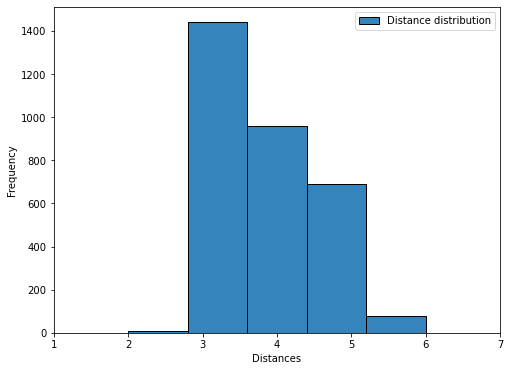

In [131]:


costs_data = costs['implementation2']

plt.figure(figsize=(8, 6))

# Plot the histogram of the data without the KDE curve line
sns.histplot(costs_data, bins=5, kde=False, alpha=0.9, label='Distance distribution')

# This will set the xticks to be integer values from 1 to 10
plt.xticks(range(1, 8))

plt.legend(loc='upper right')
plt.xlabel('Distances')
plt.ylabel('Frequency')

plt.show()


In [132]:
##### f=max(costs_data)
f

6

In [128]:
from collections import Counter


counter = Counter(costs_data)

for outcome, frequency in counter.items():
    print(f'Outcome {outcome}: {frequency}')


Outcome 3: 1440
Outcome 4: 960
Outcome 5: 690
Outcome 6: 80
Outcome 2: 10


In [338]:
df = pd.read_excel('costs_dataRealCE.xlsx')
column_list = df['implementation2'].tolist()
counter = Counter(column_list)

for outcome, frequency in counter.items():
    print(f'Outcome {outcome}: {frequency}')


Outcome 3: 930
Outcome 4: 1920
Outcome 7: 3700
Outcome 6: 3480
Outcome 8: 3040
Outcome 10: 1170
Outcome 5: 3120
Outcome 9: 2170
Outcome 11: 380
Outcome 2: 30
Outcome 12: 50
Outcome 13: 10


In [314]:
df = pd.DataFrame(costs_data, columns=['implementation2'])

df.to_excel('costs_dataRandom3.xlsx', index=False)


In [538]:
import time
import random
import threading
import numpy as np
from scipy.stats import ttest_ind

# Define a dictionary to store the runtimes
runtimes = {'implementation1': [], 'implementation2': []}

# Define the number of trials to run
n_trials = 10

# Define a function to run Dijkstra's algorithm using the first implementation
def run_dijkstra1(source, target):
    start_time = time.time()
    shortest_path = shortest_path_cost(source, target, lattice, nodes, up_cost, down_cost)
    end_time = time.time()
    runtime = end_time - start_time
    runtimes['implementation1'].append(runtime)

# Define a function to run Dijkstra's algorithm using the second implementation
def run_dijkstra2(source, target):
    start_time = time.time()
    shortest_path = shortest_path_costL(source, target, lattice_edges, up_cost, down_cost)
    end_time = time.time()
    runtime = end_time - start_time
    runtimes['implementation1'].append(runtime)

# Define a function to run Dijkstra's algorithm using the second implementation
def run_dijkstra3(source, target):
    start_time = time.time()
    shortest_path = shortest_path_costLL(source, target, lattice_edges, up_cost, down_cost)
    end_time = time.time()
    runtime = end_time - start_time
    runtimes['implementation2'].append(runtime)

# Create a list of source and target nodes
nodes = sorted(set(frozenset(node) for pair in lattice for node in pair))
sample_size=[len(lattice_edges)*0.3,len(lattice_edges)*0.20,len(lattice_edges)*0.30]
pairs = [(random.choice(nodes), random.choice(nodes)) for i in range(round(sample_size[0]))]
# Run multiple trials
for trial in range(n_trials):
    # Create a new list of pairs for each trial
    # Create a list of threads, one for each pair of nodes
    threads = []
    for pair in pairs:
        t1 = threading.Thread(target=run_dijkstra1, args=pair)
        t2 = threading.Thread(target=run_dijkstra3, args=pair)
        threads.append(t1)
        threads.append(t2)

    # Start all threads
    for t in threads:
        t.start()

    # Wait for all threads to finish
    for t in threads:
        t.join()

# Calculate the average runtime and standard deviation for each implementation
avg_runtime1 = np.mean(runtimes['implementation1'])
std_runtime1 = np.std(runtimes['implementation1'])
avg_runtime2 = np.mean(runtimes['implementation2'])
std_runtime2 = np.std(runtimes['implementation2'])

# Print the average runtimes and standard deviations for each implementation
print('Implementation 1 average runtime:', avg_runtime1, 'standard deviation:', std_runtime1)
print('Implementation 2 average runtime:', avg_runtime2, 'standard deviation:', std_runtime2)

# Perform a t-test to determine if the difference in runtimes is statistically significant
t_statistic, p_value = ttest_ind(runtimes['implementation1'], runtimes['implementation2'])
if p_value < 0.05:
    print('The difference in runtimes is statistically significant.')
else:
    print('The difference in runtimes is not statistically significant.')


Implementation 1 average runtime: 0.2519333535346432 standard deviation: 0.16499906285141483
Implementation 2 average runtime: 0.0016542047694109488 standard deviation: 0.015061528719895355
The difference in runtimes is statistically significant.


In [532]:
runtimes

{'implementation1': [], 'implementation2': []}

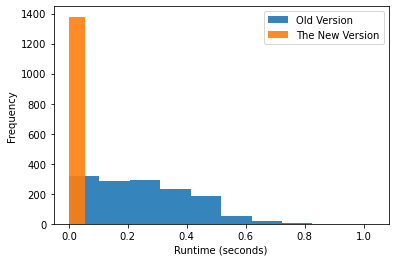

In [706]:
plt.hist(runtimes['implementation1'], bins=10, alpha=0.9, label='Old Version')
plt.hist(runtimes['implementation2'], bins=10, alpha=0.9, label='The New Version')
plt.legend(loc='upper right')
plt.xlabel('Runtime (seconds)')
plt.ylabel('Frequency')
plt.show()

In [133]:
import pandas as pd

# Define your dictionary
# Create a DataFrame from the dictionary# convert the dictionary to a pandas DataFrame
df = pd.DataFrame(runtimes)

# export the DataFrame to an Excel file
df.to_excel("runtimes1.xlsx", index=False)

In [26]:
import time
import random
import threading
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

lattice 1
lattice 2
lattice 3
lattice 4
lattice 5


Text(0.5, 1.0, "Runtime of Dijkstra's algorithm for different graph sizes")

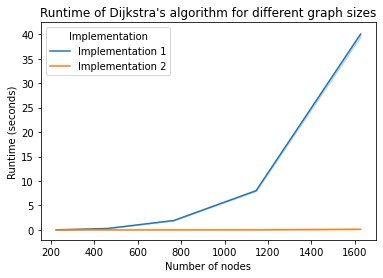

In [475]:


# Define a dictionary to store the runtimes
runtimes = {'implementation1': [], 'implementation2': []}

# Define the number of trials to run
n_trials = 10

# Define a function to run Dijkstra's algorithm using the first implementation
def run_dijkstra1(source, target,lattice):
    start_time = time.time()
    shortest_path = shortest_path_cost(source, target, lattice, nodes, up_cost, down_cost)
    end_time = time.time()
    runtime = end_time - start_time
    runtimes['implementation1'].append(runtime)

# Define a function to run Dijkstra's algorithm using the second implementation
def run_dijkstra2(source, target,lattice_edges):
    start_time = time.time()
    shortest_path = shortest_path_costL(source, target, lattice_edges, up_cost, down_cost)
    end_time = time.time()
    runtime = end_time - start_time
    runtimes['implementation1'].append(runtime)
def run_dijkstra3(source, target,lattice_edges):
    start_time = time.time()
    shortest_path = shortest_path_costLL(source, target, lattice_edges, up_cost, down_cost)
    end_time = time.time()
    runtime = end_time - start_time
    runtimes['implementation2'].append(runtime)

# Create a list of graphs
lattice_edgeses = [lattice_edges1, lattice_edges2, lattice_edges3, 
                 lattice_edges4,lattice_edges5]
lattices=[lattice1,lattice2,lattice3,lattice4,lattice5]

# Create an empty list to store the runtimes for each graph size
runtimes_by_size = []

# Loop over the graphs and run Dijkstra's algorithm for each graph
for i, lattice in enumerate(lattices):
    print('lattice',i+1)
    # Get the number of nodes and edges in the current graph
    num_nodes = len(lattice_edgeses[i])
    num_edges = len(lattice)

    # Create a list of source and target nodes
    nodes = sorted(set(frozenset(node) for pair in lattice for node in pair))
    pairs = [(random.choice(nodes), random.choice(nodes)) for i in range(round(num_nodes*0.25))]
    # Run multiple trials
    for trial in range(n_trials):
        # Create a new list of pairs for each trial
        threads = []
        for pair in pairs:
            t1 = threading.Thread(target=run_dijkstra1, args=pair + (lattice,))
            t2 = threading.Thread(target=run_dijkstra3, args=pair + (lattice_edgeses[i],))
            threads.append(t1)
            threads.append(t2)

        # Start all threads
        for t in threads:
            t.start()

        # Wait for all threads to finish
        for t in threads:
            t.join()
        # Store the runtimes for this graph size
        runtimes_by_size.append((num_nodes, np.mean(runtimes['implementation1']), np.mean(runtimes['implementation2'])))

    # Clear the runtimes dictionary for the next iteration
    runtimes['implementation1'].clear()
    runtimes['implementation2'].clear()

# Convert the runtimes to a Pandas DataFrame
df = pd.DataFrame(runtimes_by_size, columns=['Num nodes', 'Implementation 1', 'Implementation 2'])

# Melt the DataFrame so that the runtimes for each implementation are in a single column
df_melted = df.melt(id_vars='Num nodes', var_name='Implementation', value_name='Runtime')

# Plot the runtimes using a line plot
sns.lineplot(data=df_melted, x='Num nodes', y='Runtime', hue='Implementation')

# Add axis labels and a title to the plot
plt.xlabel('Number of nodes')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime of Dijkstra\'s algorithm for different graph sizes')


In [524]:
#runtimes_by_size=[(224, 0.01863097060810436, 0.0006903951818292791), (224, 0.01873780380595814, 0.0006574717434969815), (224, 0.01852254795305657, 0.0006454749540849166), (224, 0.01853661645542492, 0.0006406334313479337), (224, 0.01837438670071689, 0.0006368030201305043), (460, 0.2451156274132107, 0.001301780990932299), (460, 0.2355911913125411, 0.001285324925961702), (460, 0.2347066592479098, 0.001264617062997127), (460, 0.2403400618097057, 0.001252622708030369), (460, 0.240558091453884, 0.001246859716332477), (766, 1.662168815538481, 0.004597858949141068), (766, 1.694790067610803, 0.003536431820361645), (766, 1.745206192974404, 0.004141706408876361), (766, 1.737185973625679, 0.003712934333008605), (766, 1.763256750478373, 0.003445883540364055), (1145, 8.206577809233414, 0.02049480195631061), (1145, 8.47406431352883, 0.01632610538549591), (1145, 8.715523836208366, 0.01602829827202691), (1145, 8.824030727148056, 0.01819281097044025), (1145, 8.883708827119124, 0.01919229532542982), (1626, 40.7030890397499, 0.1564571638048792), (1626, 37.26933032530217, 0.1370362518755205), (1626, 36.29058605566591, 0.1282998218614387), (1626, 39.42728193405947, 0.1639574001903183), (1626, 39.33317658652557, 0.162159745971118)]
runtimes_by_size1 = [(t[1], t[2]) for t in runtimes_by_size]
runtimes_by_size

[(224, 0.016343708549227034, 0.0006062729018075126),
 (224, 0.016154636229787554, 0.0005887789385659355),
 (224, 0.016206068652016774, 0.0005810090473720006),
 (224, 0.016220645180770328, 0.0005773838077272687),
 (224, 0.01621143732752119, 0.0005752733775547573),
 (224, 0.016337545145125615, 0.0005775235948108492),
 (224, 0.016352762981336946, 0.0005796253681182861),
 (224, 0.01639404147863388, 0.0005817109985010964),
 (224, 0.016430247870702592, 0.0005821070027729821),
 (224, 0.016575017997196743, 0.000589539749281747),
 (460, 0.2908460451209027, 0.0013928807300070058),
 (460, 0.294613734535549, 0.0013664297435594642),
 (460, 0.29417282463847727, 0.001367349901061127),
 (460, 0.2937590827112613, 0.0013712774152341096),
 (460, 0.291614583056906, 0.001363229751586914),
 (460, 0.2925632442253223, 0.0013571272725644318),
 (460, 0.29262493500798387, 0.001352326173960052),
 (460, 0.29132982362871584, 0.0013488585534303084),
 (460, 0.291805634982344, 0.0013454752843737026),
 (460, 0.29213475

    Num nodes  Implementation 1  Implementation 2
0         224          0.016344          0.000606
1         224          0.016155          0.000589
2         224          0.016206          0.000581
3         224          0.016221          0.000577
4         224          0.016211          0.000575
5         224          0.016338          0.000578
6         224          0.016353          0.000580
7         224          0.016394          0.000582
8         224          0.016430          0.000582
9         224          0.016575          0.000590
10        460          0.290846          0.001393
11        460          0.294614          0.001366
12        460          0.294173          0.001367
13        460          0.293759          0.001371
14        460          0.291615          0.001363
15        460          0.292563          0.001357
16        460          0.292625          0.001352
17        460          0.291330          0.001349
18        460          0.291806          0.001345


Text(0.5, 1.0, "Shifted logarithmic runtime of Dijkstra's algorithm for different graph sizes")

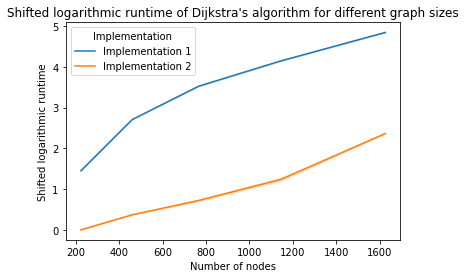

In [522]:
# Convert the runtimes to a Pandas DataFrame
df = pd.DataFrame(runtimes_by_size, columns=['Num nodes', 'Implementation 1', 'Implementation 2'])
print(df)
# Convert the runtimes to a logarithmic scale
df[['Implementation 1', 'Implementation 2']] = np.log10(df[['Implementation 1', 'Implementation 2']])
print(df)
# Find the minimum logarithmic runtime
min_log_runtime = df[['Implementation 1', 'Implementation 2']].values.min()
print('min_log_runtime',min_log_runtime)
# Add the minimum logarithmic runtime to all logarithmic runtimes
df[['Implementation 1', 'Implementation 2']] += abs(min_log_runtime)
print('df')

print(df[['Implementation 1', 'Implementation 2']])
# Melt the DataFrame so that the runtimes for each implementation are in a single column
df_melted = df.melt(id_vars='Num nodes', var_name='Implementation', value_name='Logarithmic runtime')

# Plot the shifted logarithmic runtimes using a line plot
sns.lineplot(data=df_melted, x='Num nodes', y='Logarithmic runtime', hue='Implementation')

# Add axis labels and a title to the plot
plt.xlabel('Number of nodes')
plt.ylabel('Shifted logarithmic runtime')
plt.title('Shifted logarithmic runtime of Dijkstra\'s algorithm for different graph sizes')


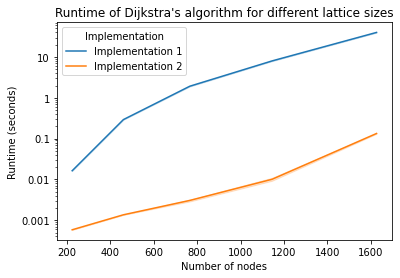

In [530]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Convert the runtimes to a Pandas DataFrame
df = pd.DataFrame(runtimes_by_size, columns=['Num nodes', 'Implementation 1', 'Implementation 2'])
# Melt the DataFrame so that the runtimes for each implementation are in a single column
df_melted = df.melt(id_vars='Num nodes', var_name='Implementation', value_name='Runtime')

# Plot the runtimes using a line plot
sns.lineplot(data=df_melted, x='Num nodes', y='Runtime', hue='Implementation')

# Set y-axis to logarithmic scale and format the ticks to show the actual values
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.2g}'.format(y) if np.abs(y) > 1e-10 else '0'))

# Add axis labels and a title to the plot
plt.xlabel('Number of nodes')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime of Dijkstra\'s algorithm for different lattice sizes')
plt.show()


In [203]:
df = pd.DataFrame(runtimes_by_size)

# Export the DataFrame to an Excel file
df.to_excel('runtimes_by_size12.xlsx', index=False)

In [40]:
def shortest_path_costLLN(start, end, lattice_edges, up_cost, down_cost):
    if not lattice:
        return None
    
    cost_map = {node: (float('inf'), None) for node in list(lattice_edges.keys())}
    cost_map[start] = (0, None)
    queue = [(0, start)]
    
    #if visited is None:
    visited = set()
    
    while queue:
        current_cost, current_node = heapq.heappop(queue)
        if current_node == end:
            path = []
            while current_node is not None:
                path.append(set(current_node))
                current_node = cost_map[frozenset(current_node)][1]
            return current_cost
        
        visited.add(frozenset(current_node))
        try:
            neighbors = lattice_edges[frozenset(current_node)]
        except KeyError:
            # Handle the error here, for example:
            print("Current node not found in lattice_edges dictionary.")
            neighbors = []
        for neighbor in neighbors:
            if set(neighbor) not in visited:
                #cost = up_cost if (current_node, neighbor) in lattice else down_cost
                cost= up_cost if current_node.issuperset(neighbor) else down_cost
                total_cost = current_cost + cost
                if total_cost < cost_map[frozenset(neighbor)][0]:
                    cost_map[frozenset(neighbor)] = (total_cost, current_node)
                    heapq.heappush(queue, (total_cost, neighbor))
    
    return None

In [128]:
import time
import random
import threading
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a dictionary to store the runtimes
runtimes = {'implementation2': []}
costs = {'implementation2_c': []}

# Define the number of trials to run
n_trials = 2

# Define a function to run Dijkstra's algorithm using the third implementation
def run_dijkstra3(source, target, lattice_edges):
    start_time = time.time()
    cost = shortest_path_costLLN(source, target, lattice_edges, up_cost, down_cost)
    end_time = time.time()
    runtime = end_time - start_time
    runtimes['implementation2'].append(runtime)
    costs['implementation2_c'].append(cost)
# Create a list of graphs
lattice_edgeses = [lattice_edgesL1]
lattices = [latticeL1]

# Create an empty list to store the runtimes for each graph size
runtimes_by_size = []
costs_by_size = []

# Loop over the graphs and run Dijkstra's algorithm for each graph
for i, lattice_edgese in enumerate(lattice_edgeses):
    print('lattice', i + 1)
    lattice=lattices[i]
    # Get the number of nodes and edges in the current graph
    num_nodes = len(lattice_edgeses[i])
    #num_edges = len(lattice)

    # Create a list of source and target nodes
    nodes = list(lattice_edgese.keys())
    pairs = [(random.choice(nodes), random.choice(nodes)) for i in range(round(num_nodes * 0.02))]
    
    # Run multiple trials
    for trial in range(n_trials):
        # Create a new list of pairs for each trial
        threads = []
        for pair in pairs:
            t2 = threading.Thread(target=run_dijkstra3, args=pair + (lattice_edgeses[i],))
            threads.append(t2)

        # Start all threads
        for t in threads:
            t.start()

        # Wait for all threads to finish
        for t in threads:
            t.join()
        
        # Store the runtimes for this graph size
        runtimes_by_size.append((num_nodes, np.mean(runtimes['implementation2'])))
        costs_by_size.append((num_nodes, np.mean(costs['implementation2_c'])))
    # Clear the runtimes dictionary for the next iteration
    runtimes['implementation2'].clear()
    costs['implementation2_c'].clear()

lattice 1


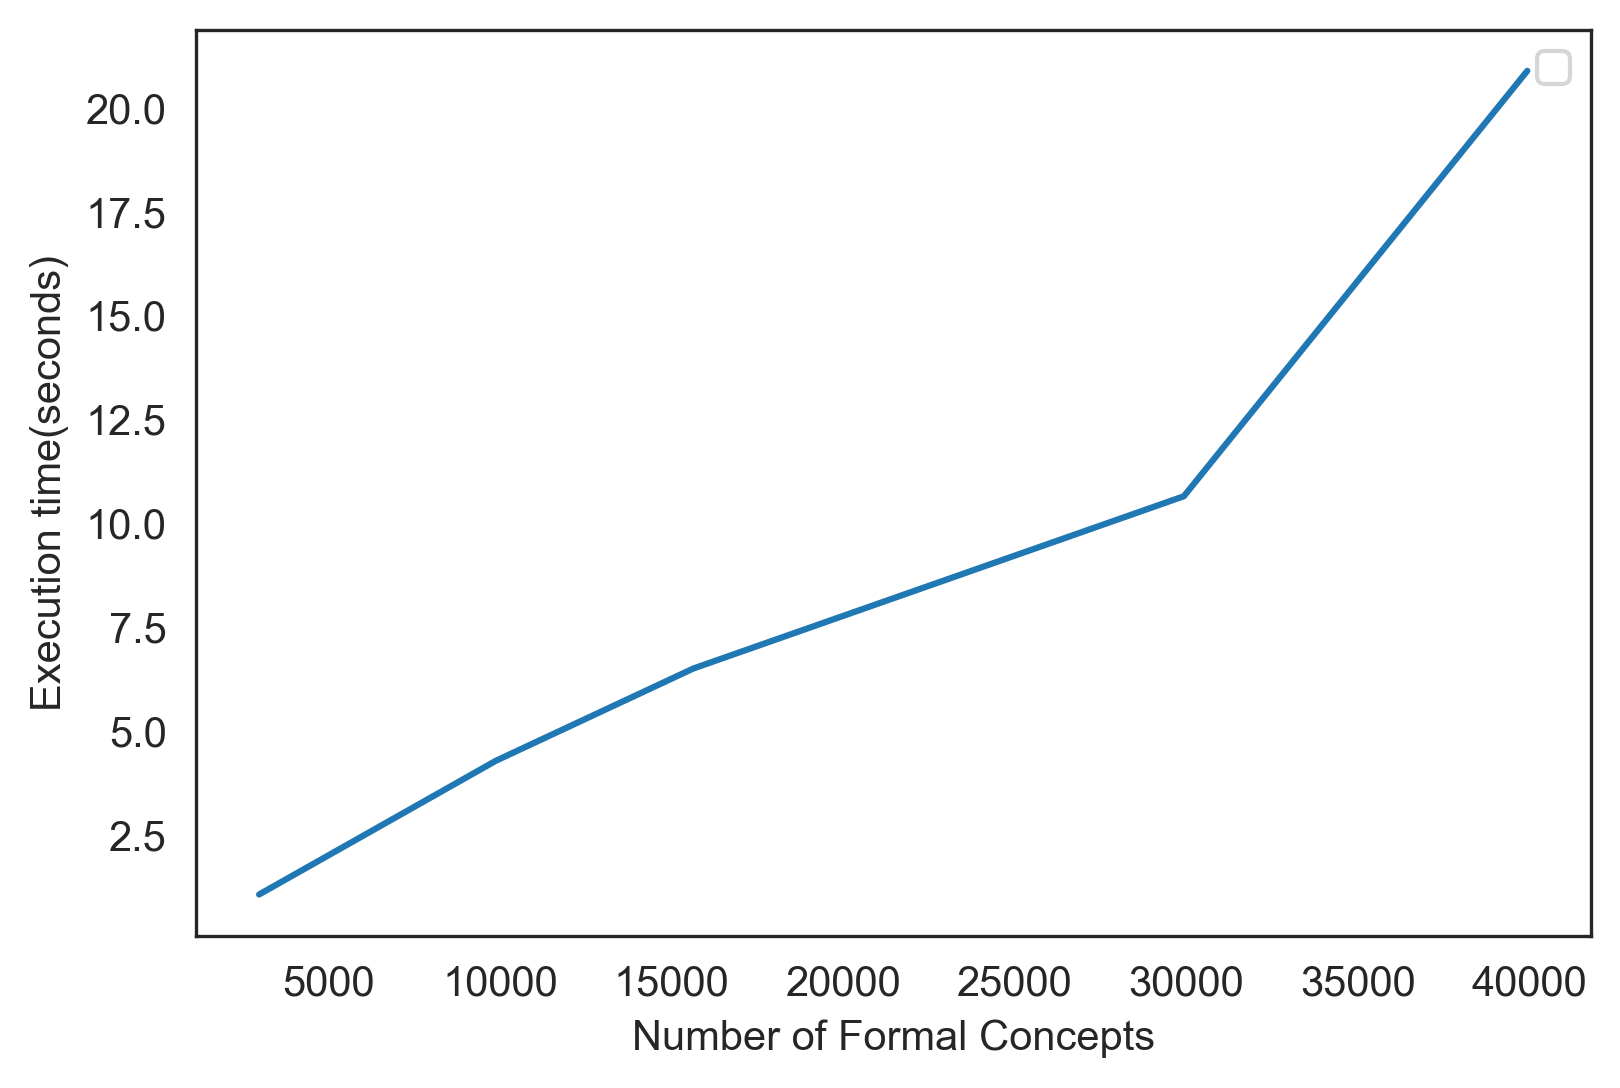

In [17]:
# Convert the runtimes to a Pandas DataFrame
df = pd.DataFrame(runtimes_by_sizeN, columns=['Num nodes', 'Implementation 2'])

# Melt the DataFrame so that the runtimes for each implementation are in a single column
df_melted = df.melt(id_vars='Num nodes', var_name='Implementation', value_name='Runtime')

# Create a new figure with high resolution
plt.figure(dpi=300)

# Plot the runtimes using a line plot
ax = sns.lineplot(data=df_melted, x='Num nodes', y='Runtime', hue='Implementation', ci=None)

# Remove the legend title
ax.get_legend().set_title('')

# Remove the legend label
ax.legend(labels=[])

# Add axis labels and a title to the plot
plt.xlabel('Number of Formal Concepts')
plt.ylabel('Execution time(seconds)')
#plt.title('Runtime of Dijkstra-based distance measure algorithm on different concept lattice sizes')

# Show the plot
plt.show()


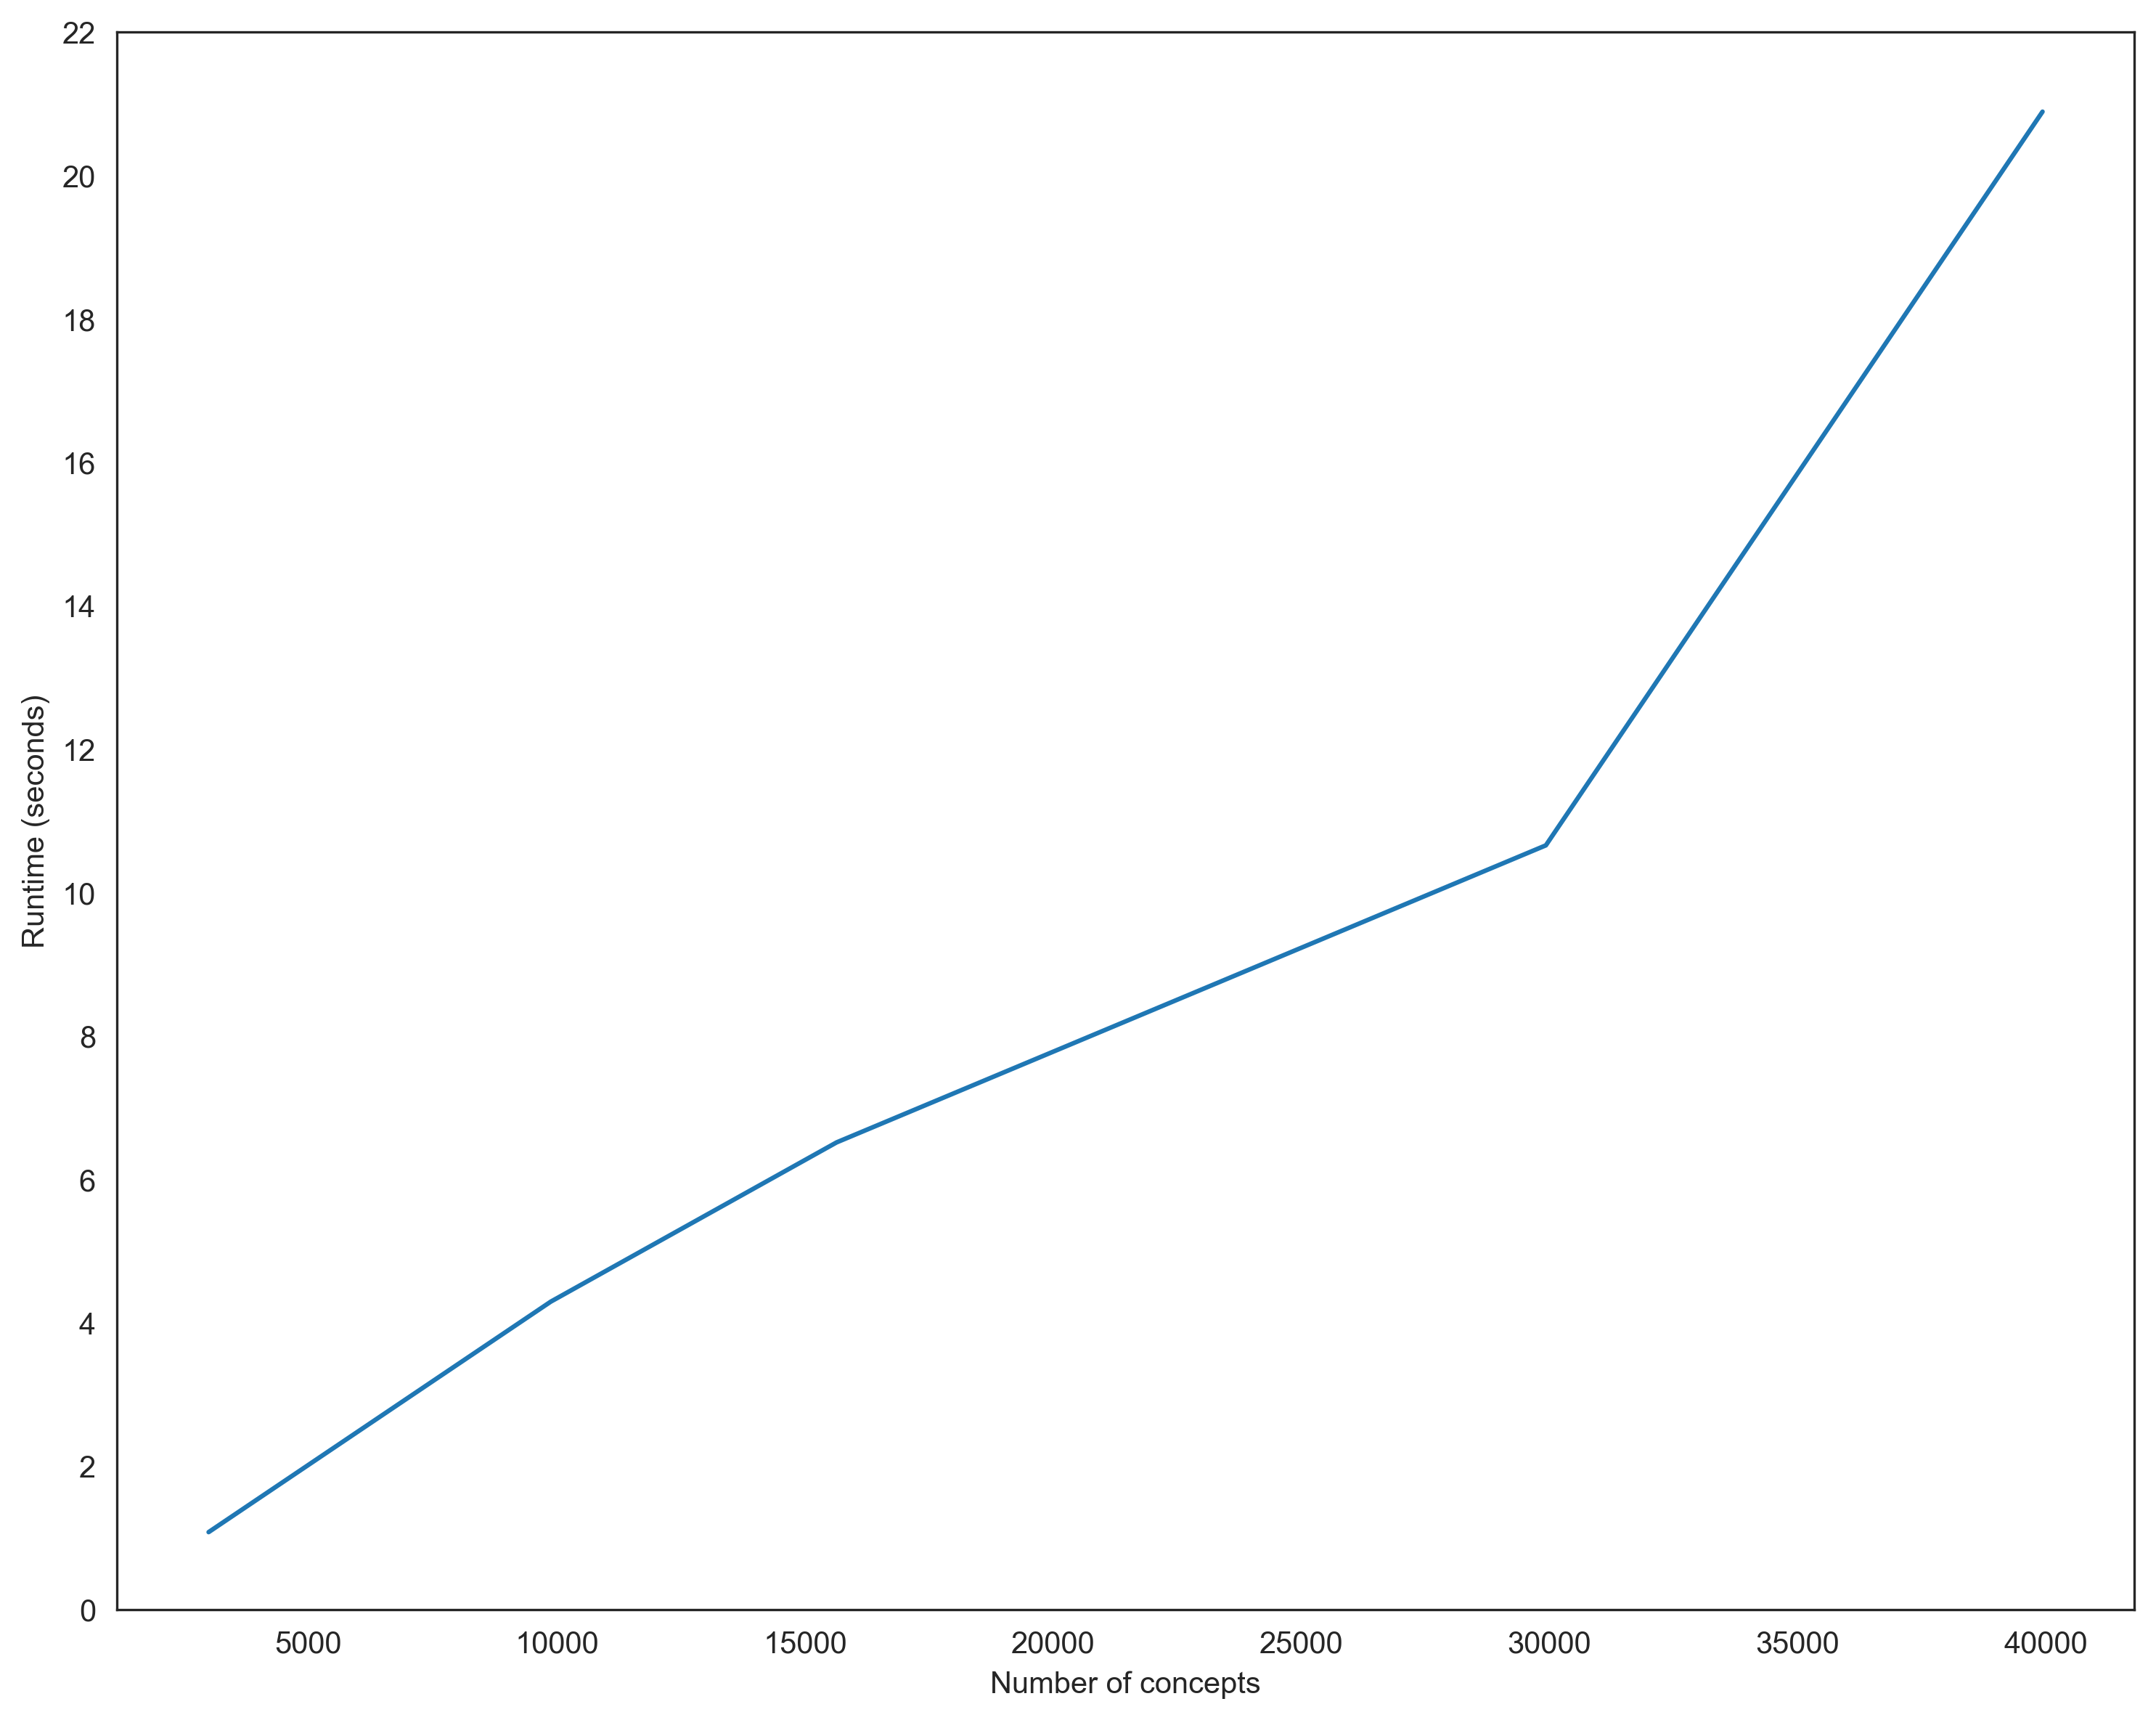

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the runtimes to a Pandas DataFrame
df = pd.DataFrame(runtimes_by_sizeN, columns=['Num nodes', 'Implementation 2'])

# Melt the DataFrame so that the runtimes for each implementation are in a single column
df_melted = df.melt(id_vars='Num nodes', var_name='Implementation', value_name='Runtime')

# Create a new figure with high resolution
plt.figure(figsize=(10, 8), dpi=300)

# Plot the runtimes using a line plot
ax = sns.lineplot(data=df_melted, x='Num nodes', y='Runtime', hue='Implementation', ci=None)

# Remove the legend title
ax.get_legend().remove()

# Add axis labels and a title to the plot
plt.xlabel('Number of concepts')
plt.ylabel('Runtime (seconds)')

# Here you adjust your y-ticks to show only integer values
y_max = np.ceil(df_melted['Runtime'].max())
plt.yticks(np.arange(0, y_max, 2))

# Adjust the layout to fit all elements within the figure area
plt.tight_layout()

#plt.title('Runtime of Dijkstra-based distance measure algorithm on different concept lattice sizes')

# Show the plot
plt.show()


In [8]:
def rescale(value, input_min, input_max, output_min, output_max):
    # First normalize the value to a 0-1 range
    normalized_value = (value - input_min) / (input_max - input_min)
    
    # Then rescale it to the output range
    rescaled_value = (normalized_value * (output_max - output_min)) + output_min
    
    return rescaled_value

input_min = 0.000695
input_max = 0.229
output_min = 0.08
output_max = 5.03

rescaled_runtimes_by_size = [(size, rescale(runtime, input_min, input_max, output_min, output_max)) 
                             for size, runtime in runtimes_by_size]



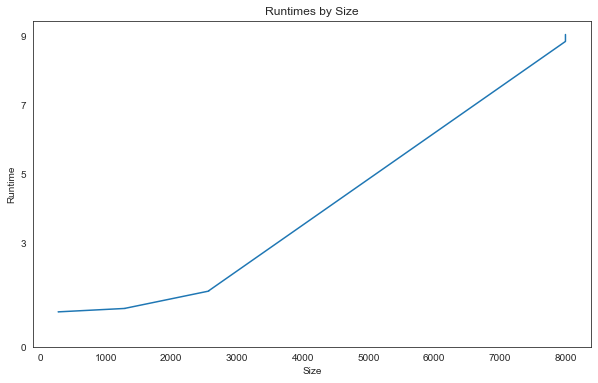

In [25]:
import matplotlib.pyplot as plt

runtimes_by_size = rescaled_runtimes_by_size

# separate runtimes and sizes
sizes, runtimes = zip(*runtimes_by_size)

# find min and max runtimes
min_runtime = min(runtimes)
max_runtime = max(runtimes)

# define the transformation function
def transform(value, old_min, old_max, new_min, new_max):
    return (((value - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min

# apply the transformation to the runtimes
new_runtimes = [transform(runtime, min_runtime, max_runtime, 1.01, 9.03) for runtime in runtimes]

# sort the data by sizes before plotting
sorted_data = sorted(zip(sizes, new_runtimes))
sorted_sizes, sorted_runtimes = zip(*sorted_data)

# create the plot
# create the plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_sizes, sorted_runtimes)
plt.yticks([0, 3, 5, 7, 9])
plt.title('Runtimes by Size')
plt.xlabel('Size')
plt.ylabel('Runtime')
plt.show()

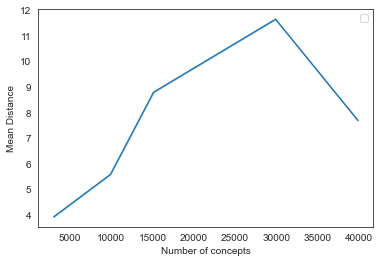

In [34]:

# Convert the costs to a Pandas DataFrame
df = pd.DataFrame(costs_by_size1, columns=['Num nodes', 'Implementation 2'])

# Melt the DataFrame so that the costs for each implementation are in a single column
df_melted = df.melt(id_vars='Num nodes', var_name='Implementation', value_name='Cost')

# Plot the costs using a line plot
ax = sns.lineplot(data=df_melted, x='Num nodes', y='Cost', hue='Implementation')

# Remove the legend title
ax.get_legend().set_title('')

# Remove the legend label
ax.legend(labels=[])

# Add axis labels and a title to the plot
plt.xlabel('Number of concepts')
plt.ylabel('Mean Distance')
#plt.title("Cost of Dijkstra's algorithm for different graph sizes")

# Display the plot
plt.show()

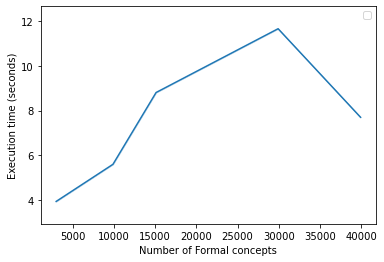

In [6]:
# Convert the costs to a Pandas DataFrame
df = pd.DataFrame(costs_by_size1, columns=['Num nodes', 'Implementation 2'])

# Melt the DataFrame so that the costs for each implementation are in a single column
df_melted = df.melt(id_vars='Num nodes', var_name='Implementation', value_name='Cost')

# Plot the costs using a line plot
ax = sns.lineplot(data=df_melted, x='Num nodes', y='Cost', hue='Implementation')

# Remove the legend title
ax.get_legend().set_title('')

# Remove the legend label
ax.legend(labels=[])

# Add axis labels and a title to the plot
plt.xlabel('Number of Formal concepts')
plt.ylabel('Execution time (seconds)')
#plt.title("Cost of Dijkstra's algorithm for different graph sizes")

# Set the y-limits to ensure all data points are included
ax.set_ylim(df_melted['Cost'].min() - 1, df_melted['Cost'].max() + 1)

# Display the plot
plt.show()


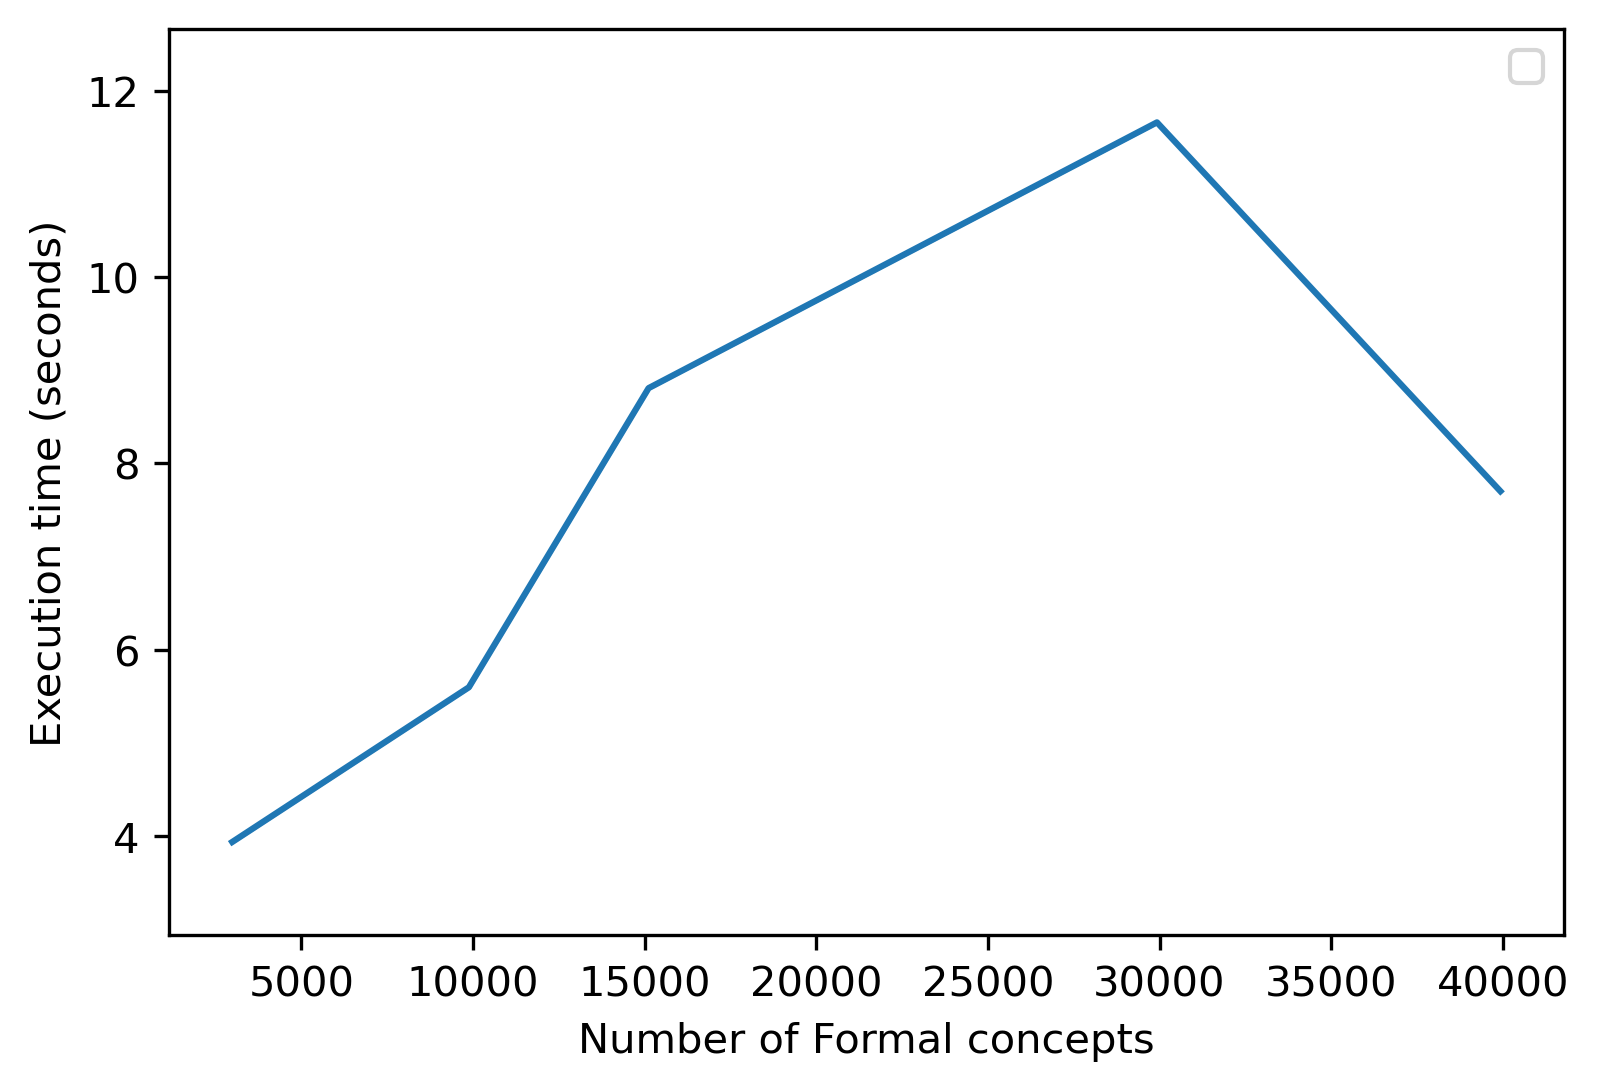

In [7]:
# Convert the costs to a Pandas DataFrame
df = pd.DataFrame(costs_by_size1, columns=['Num nodes', 'Implementation 2'])

# Melt the DataFrame so that the costs for each implementation are in a single column
df_melted = df.melt(id_vars='Num nodes', var_name='Implementation', value_name='Cost')

# Create a new figure with high resolution
plt.figure(dpi=300)

# Plot the costs using a line plot
ax = sns.lineplot(data=df_melted, x='Num nodes', y='Cost', hue='Implementation')

# Remove the legend title
ax.get_legend().set_title('')

# Remove the legend label
ax.legend(labels=[])

# Add axis labels and a title to the plot
plt.xlabel('Number of Formal concepts')
plt.ylabel('Execution time (seconds)')
#plt.title("Cost of Dijkstra's algorithm for different graph sizes")

# Set the y-limits to ensure all data points are included
ax.set_ylim(df_melted['Cost'].min() - 1, df_melted['Cost'].max() + 1)

# Display the plot
plt.show()


In [31]:
def precompute_distances(nodes):
    print('Distance')
    matrix = {}
    for node_a in nodes:
        matrix[node_a] = {}
        for node_b in nodes:
            matrix[node_a][node_b] = shortest_path_costLL(node_a, node_b, lattice_edges, up_cost=2, down_cost=1)
    return matrix
nodes = list(lattice_edges.keys())
distance_matrix=precompute_distances(nodes) 
print('done')

Distance
done


In [32]:
Tae=distance_matrix
len(Tae)

276

In [375]:
breastcancerss=distance_matrix
len(breastcancerss)

2569

In [330]:
balancescale=distance_matrix
len(balancescale)

1297

In [691]:
# Create a DataFrame from the matrix data
df = pd.DataFrame(Tae1)

# Define the Excel file path
excel_file_path =(r'/Users/malwersh/Desktop/Tae1.xlsx')

# Export the DataFrame to an Excel file
df.to_excel(excel_file_path, index=False)

print(f"Matrix data has been exported to '{excel_file_path}'.")

Matrix data has been exported to '/Users/malwersh/Desktop/Tae1.xlsx'.


In [437]:
import pickle
# Define the file path for storing the distance matrix
file_path = (r'/Users/malwersh/Desktop/Tae.pkl')

# Save the distance matrix to the file
with open(file_path, 'wb') as f:
    pickle.dump(Tae, f)

print(f"Distance matrix has been stored in '{file_path}'.")


Distance matrix has been stored in '/Users/malwersh/Desktop/Tae.pkl'.


In [594]:
import pickle

# Define the file path for the stored distance matrix
file_path = (r'/Users/malwersh/Desktop/bunchdatsets/breast-cancer1/breastcancerss.pkl')

# Load the distance matrix from the file
with open(file_path, 'rb') as f:
    breastcancerss = pickle.load(f)


distance_matrix=breastcancerss

In [137]:
import random
import numpy as np
import heapq

class K_Lattice1:
    def __init__(self, lattice_edges, up_cost, down_cost, k, max_iterations):
        #big O(N) --> |nodes|
        self.lattice_edges = lattice_edges
        self.up_cost = up_cost
        self.down_cost = down_cost
        self.k = k
        self.max_iterations = max_iterations
        self.nodes = list(lattice_edges.keys())
        self.iterations = 0
    #def distance(self, node1, node2):
        #cost, _ = self.shortest_path_cost(node1, node2)
        #return cost

    def initial_centroids(self):
        #big O(k)
        cent=random.sample(self.nodes, self.k)
        return cent

    def assign_clusters(self, centroids):
        clusters = {centroid: [] for centroid in centroids}
        for node in self.nodes:
            if node==set():
                continue
            min_distance = float('inf')
            closet_centroid = None
            for centroid in centroids:
                dist = self.shortest_path_costLL(node, centroid)
                if dist < min_distance:
                    min_distance = dist
                    closet_centroid = centroid
            clusters[closet_centroid].append(node)
        return clusters

    def update_centroids(self, clusters):
        #big O(n^3mklogn)
        new_centroids = []
        for centroid, cluster_nodes in clusters.items():
            if not cluster_nodes:
                new_centroids.append(centroid)
                continue
            min_distance_sum = float('inf')
            new_centroid = None
            for node in cluster_nodes:
                distance_sum = sum(self.shortest_path_costLL(node, other) for other in cluster_nodes)
                if distance_sum < min_distance_sum:
                    min_distance_sum = distance_sum
                    new_centroid = node
            new_centroids.append(new_centroid)
        return new_centroids
    
    def kmeans(self):
        #big O(max_iterations*(n^2mklogn+n^3mklogn))
        #big O(max_iterations*n^3mklogn)-----> for highest order
        centroids = self.initial_centroids()
        for i in range(self.max_iterations):
            print('centroids',centroids)
            self.iterations = i
            clusters = self.assign_clusters(centroids)
            print('assign_clusters Done')
            new_centroids = self.update_centroids(clusters)
            if np.array_equal(centroids, new_centroids):
                break
            centroids = new_centroids
        return clusters,new_centroids
    def plot_clusters(self):
        kernel_sizes = [2,3] # you can include more kernels if needed
        colors = ['blue', 'orange']  # Define colors for each k

        plt.figure(figsize=(10, 6))

        for i, k in enumerate(kernel_sizes):
            clusters, centroids = self.kmeans()
            
            all_dists = []
            for centroid, cluster in clusters.items():
                for node in cluster:
                    dist = self.shortest_path_costLL(node, centroid)
                    all_dists.append(dist)

            all_dists = np.array(all_dists)
            min_dists = all_dists[~np.isnan(all_dists)]

            # Compute the mean of minimum distances
            mean_dist = np.mean(min_dists)
            print(f'Mean minimum distance for kernel {k}: {mean_dist}')

            # Plot the histogram of minimum distances
            plt.hist(min_dists, bins=3, alpha=0.5, color=colors[i], label=f'Kernel {k}')

        plt.title('Histograms of distances to nearest centroid')
        plt.xlabel('Distance to nearest centroid')
        plt.ylabel('Frequency')
        plt.legend(loc='upper right')

        plt.tight_layout()
        plt.show()
    def shortest_path_costLL(self,start, end):
        if not self.lattice_edges:
            return None

        cost_map = {node: (float('inf'), None) for node in list(self.lattice_edges.keys())}
        cost_map[start] = (0, None)
        queue = [(0, start)]

        #if visited is None:
        visited = set()

        while queue:
            current_cost, current_node = heapq.heappop(queue)
            if current_node == end:
                path = []
                while current_node is not None:
                    path.append(set(current_node))
                    current_node = cost_map[frozenset(current_node)][1]
                return current_cost

            visited.add(frozenset(current_node))
            try:
                neighbors = self.lattice_edges[frozenset(current_node)]
            except KeyError:
                # Handle the error here, for example:
                print("Current node not found in lattice_edges dictionary.")
                neighbors = []
            for neighbor in neighbors:
                if set(neighbor) not in visited:
                    #cost = up_cost if (current_node, neighbor) in lattice else down_cost
                    cost= up_cost if current_node.issuperset(neighbor) else down_cost
                    total_cost = current_cost + cost
                    if total_cost < cost_map[frozenset(neighbor)][0]:
                        cost_map[frozenset(neighbor)] = (total_cost, current_node)
                        heapq.heappush(queue, (total_cost, neighbor))

        return None
ks=[3]
for k in ks:
    start=time.time()
    kml = K_Lattice1(lattice_edges, up_cost=2, down_cost=1, k=k, max_iterations=100)
    cl,ce=kml.kmeans() 
    
    for c in ce:
        print(len(cl[c]))
    end=time.time()
    print(end-start)
    

centroids [frozenset({'walk', 'domestic', '4_legs'}), frozenset({'middle', 'walk', 'domestic', '4_legs'}), frozenset({'2_legs', 'fly', 'wild', 'small'})]
assign_clusters Done
centroids [frozenset({'walk', '4_legs'}), frozenset({'walk', 'middle', '4_legs'}), frozenset({'2_legs', 'fly', 'wild', 'small'})]
assign_clusters Done
centroids [frozenset({'walk', '4_legs'}), frozenset({'walk', 'middle', '4_legs'}), frozenset({'wild'})]
assign_clusters Done
13
11
8
0.06913590431213379


In [138]:
from sklearn.metrics import silhouette_score

# Assuming `dist_matrix` is your computed distance matrix and `labels` are your cluster labels
labels = [None] * len(kml.nodes)
clusre=0
for centroid, cluster_nodes in cl.items():
    for node in cluster_nodes:
        labels[kml.nodes.index(node)] = clusre
    clusre=clusre+1
# Assuming `labels` is your list
labels = labels[1:-1]
len(labels)

31

In [133]:
import pickle
import numpy as np
def import_distance_matrix(filename):
    with open(filename, 'rb') as file:
        matrix = pickle.load(file)
    return matrix

# Example usage
loaded_distance_matrix = import_distance_matrix('distance_matrix_Tae.pkl')

distance_matrix=loaded_distance_matrix

In [135]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [117]:
import numpy as np
from sklearn.metrics import silhouette_score

# Step 1: Calculate the center of the plot
center = np.mean(distance_matrix, axis=0)

# Step 2: Calculate the distance of each data point from the center
distances = np.linalg.norm(distance_matrix - center, axis=1)

# Step 3: Create a new axis
new_axis = np.expand_dims(distances, axis=1)
new_matrix = np.hstack((distance_matrix, new_axis))

# Step 4: Check linear separability (visualization)
import numpy as np
from sklearn.metrics import silhouette_score

# Compute silhouette score
score = silhouette_score(new_matrix, labels)
print('Silhouette Score: ', score)



Silhouette Score:  0.12462207571484096


In [79]:
from sklearn.metrics import davies_bouldin_score

# Assuming `X` is your dataset where rows are samples and columns are features
# and `labels` are the cluster labels for each sample
dbi_score = davies_bouldin_score(distance_matrix, labels)
print('Davies-Bouldin Index:', dbi_score)


Davies-Bouldin Index: 2.7685097348038785


In [86]:
from sklearn.metrics import silhouette_score

def run_k_means():
    ks=[3]
    for k in ks:
        start=time.time()
        kml = K_Lattice1(lattice_edges, up_cost=3, down_cost=1, k=k, max_iterations=10)
        cl,ce=kml.kmeans() 

        for c in ce:
            print(len(cl[c]))
        end=time.time()
        print(end-start)

    # Assuming `dist_matrix` is your computed distance matrix and `labels` are your cluster labels
    labels = [None] * len(kml.nodes)
    clusre=0
    for centroid, cluster_nodes in cl.items():
        for node in cluster_nodes:
            labels[kml.nodes.index(node)] = clusre
        clusre=clusre+1
    # Assuming `labels` is your list
    labels = labels[1:-1]

    score = silhouette_score(distance_matrix, labels, metric='precomputed')
    print('Silhouette Score: ', score)
    return score

# Run the k-means 10 times and store the silhouette scores
scores = []
for _ in range(10):
    scores.append(run_k_means())

# Compute the average silhouette score
avg_score = sum(scores) / len(scores)
print('Average Silhouette Score over 10 runs: ', avg_score)


centroids [frozenset({'Summer_or_regular_2', 'Course_Instructor_14', 'Class_Size_17', 'Course_23', 'Eng_Nat_spk_2'}), frozenset({'Summer_or_regular_2', 'Class_Size_19', 'Eng_Nat_spk_2'}), frozenset({'Summer_or_regular_2', 'Eng_Nat_spk_1', 'Course_Instructor_17'})]
assign_clusters Done
centroids [frozenset({'Course_11', 'Course_2', 'Class_Size_7', 'Course_20', 'Class_Size_43', 'Course_Instructor_19', 'Class_Size_44', 'Course_1', 'Class_Size_31', 'Course_22', 'Course_23', 'Class_Size_13', 'Class_Size_37', 'Course_19', 'Course_Instructor_20', 'Course_Instructor_4', 'Course_Instructor_15', 'Class_Size_32', 'Class_Size_25', 'Course_25', 'Class_Size_51', 'Course_10', 'Class_Size_42', 'Course_9', 'Course_Instructor_1', 'Class_Size_18', 'Course_16', 'Class_Size_9', 'Course_18', 'Class_Size_27', 'Class_Size_49', 'Class_Size_30', 'Course_24', 'Course_14', 'Class_Size_11', 'Course_Instructor_9', 'Class_Size_15', 'Course_Instructor_25', 'Course_Instructor_10', 'Course_Instructor_18', 'Course_13', 

assign_clusters Done
37
228
10
71.09330677986145
Silhouette Score:  0.20518460273163486
centroids [frozenset({'Summer_or_regular_1', 'Course_3', 'Course_Instructor_13', 'Eng_Nat_spk_2', 'Class_Size_10'}), frozenset({'Summer_or_regular_2', 'Class_Size_27'}), frozenset({'Summer_or_regular_2', 'Course_Instructor_14', 'Class_Size_17', 'Course_22', 'Eng_Nat_spk_2'})]
assign_clusters Done
centroids [frozenset({'Eng_Nat_spk_2'}), frozenset({'Summer_or_regular_2'}), frozenset({'Summer_or_regular_2', 'Eng_Nat_spk_2'})]
assign_clusters Done
centroids [frozenset({'Course_3'}), frozenset({'Summer_or_regular_2'}), frozenset({'Summer_or_regular_2', 'Eng_Nat_spk_2'})]
assign_clusters Done
62
57
156
50.65739989280701
Silhouette Score:  0.10871180547941248
centroids [frozenset({'Course_3'}), frozenset({'Summer_or_regular_2', 'Course_Instructor_14', 'Eng_Nat_spk_2', 'Course_15'}), frozenset({'Course_Instructor_11', 'Summer_or_regular_2', 'Eng_Nat_spk_1', 'Course_16', 'Class_Size_22'})]
assign_clusters D

assign_clusters Done
112
158
5
66.46459794044495
Silhouette Score:  0.0272238982824132
centroids [frozenset({'Summer_or_regular_2', 'Class_Size_29'}), frozenset({'Summer_or_regular_2', 'Course_Instructor_20', 'Eng_Nat_spk_2'}), frozenset({'Summer_or_regular_2', 'Course_Instructor_10', 'Eng_Nat_spk_2'})]
assign_clusters Done
centroids [frozenset({'Summer_or_regular_2'}), frozenset({'Summer_or_regular_2', 'Eng_Nat_spk_2'}), frozenset({'Summer_or_regular_2', 'Course_Instructor_10', 'Eng_Nat_spk_2'})]
assign_clusters Done
centroids [frozenset({'Summer_or_regular_2'}), frozenset({'Summer_or_regular_2', 'Eng_Nat_spk_2'}), frozenset({'Course_11', 'Course_2', 'Class_Size_7', 'Course_20', 'Class_Size_43', 'Course_Instructor_19', 'Class_Size_44', 'Course_1', 'Class_Size_31', 'Course_22', 'Course_23', 'Class_Size_13', 'Class_Size_37', 'Course_19', 'Course_Instructor_20', 'Course_Instructor_4', 'Course_Instructor_15', 'Class_Size_32', 'Class_Size_25', 'Course_25', 'Class_Size_51', 'Course_10', 'Cl